In [1]:
%matplotlib inline  
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.__version__

# pip3 install matplotlib==2.2.3 seaborn==0.8.1 pandas==0.23.4 numpy==1.15.2

'2.2.3'

In [3]:
hr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr_data = hr_data.drop(columns = 'EmployeeNumber') # remove EmployeeNumbe as it does not provide value

# EmployeeNumber: to be removed
# Education, RelationshipSatisfaction,StockOptionLevel,: to be converted to factors


pd.options.display.max_columns = 900

hr_data.isnull().sum().sum()

# first table that shows which are not null
# then will sum along the aolumns
# then will tell you how many are null

# falses are 0s

#pd.set_option('display.max_columns', -1)

0

In [4]:
hr_data.tail()

# shows number of rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
# In[46]:


hr_data.dtypes

#hr_data.drop_duplicates(subset=None, keep='first', inplace=False)


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [6]:
hr_data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr_data.shape


(1470, 34)

In [8]:
hr_data[hr_data.duplicated()]

# no duplicates because there was no true value in the [] statement

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
hr_data.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
6,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Y,Yes
7,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No
8,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,Y,No
9,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No


In [10]:
hr_data.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
5,32,1005,2,2,1,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,1324,3,3,1,3,81,4,1,1,2670,9964,4,20,4,1,80,3,12,3,2,1,0,0,0
7,30,1358,24,1,1,4,67,3,1,3,2693,13335,1,22,4,2,80,1,1,2,3,1,0,0,0
8,38,216,23,3,1,4,44,2,3,3,9526,8787,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,1299,27,3,1,3,94,3,2,3,5237,16577,6,13,3,2,80,2,17,3,2,7,7,7,7


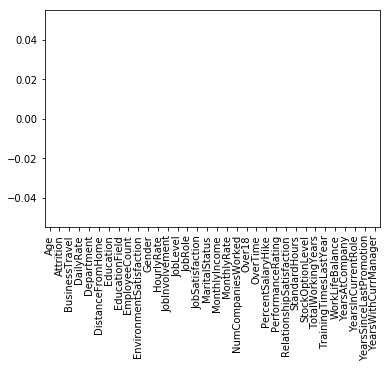

In [11]:
# In[12]:


hr_data.isnull().sum().plot(kind='bar')
# no missing data from the data set


# In[17]:


# get column names


In [12]:
# instead of hr_data_num = hr_data


hr_data_num = hr_data.copy()

# otherwise they are the same

In [13]:
# In[18]:


# the following variables are using categorical variables and we will convert them to numerical ones:Attrition, 
# BusinessTravel, Department, EducationField
#cat_vars = hr_data.select_dtypes(include=['object']).copy()
cat_vars = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole',
            'MaritalStatus','Over18','OverTime']
for i in cat_vars:
    labels = hr_data_num[i].astype('category').cat.categories.tolist()
    replace_map_comp = {i : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
    hr_data_num.replace(replace_map_comp, inplace=True)


In [14]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
hr_data_num.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
# In[26]:


hr_data_num.info()

# all ints now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1

In [17]:
# #### organize the 33 columns into 8 different featues with Attrition


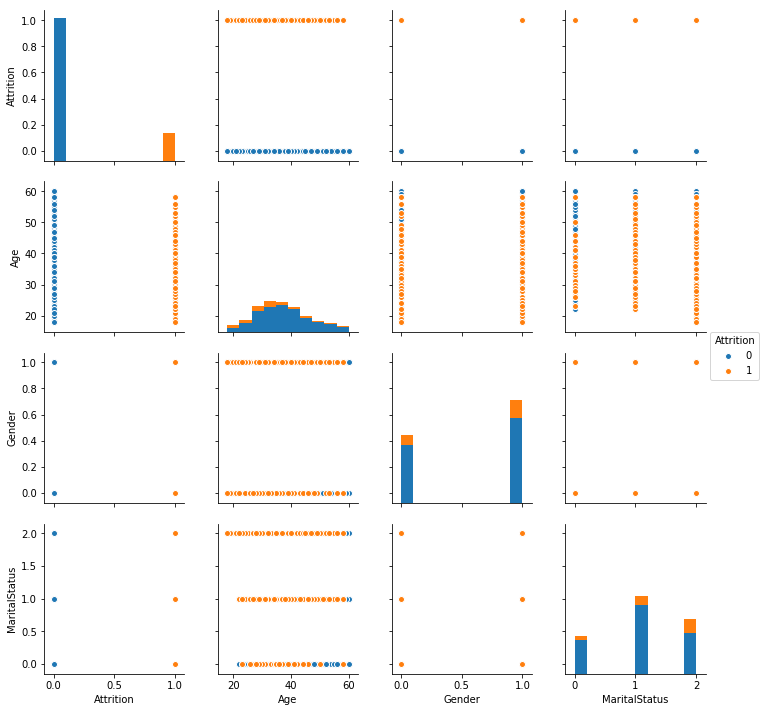

In [18]:
demo_data = hr_data_num[['Attrition','Age','Gender','MaritalStatus']]
pair_plot = sns.pairplot(demo_data, hue = 'Attrition')



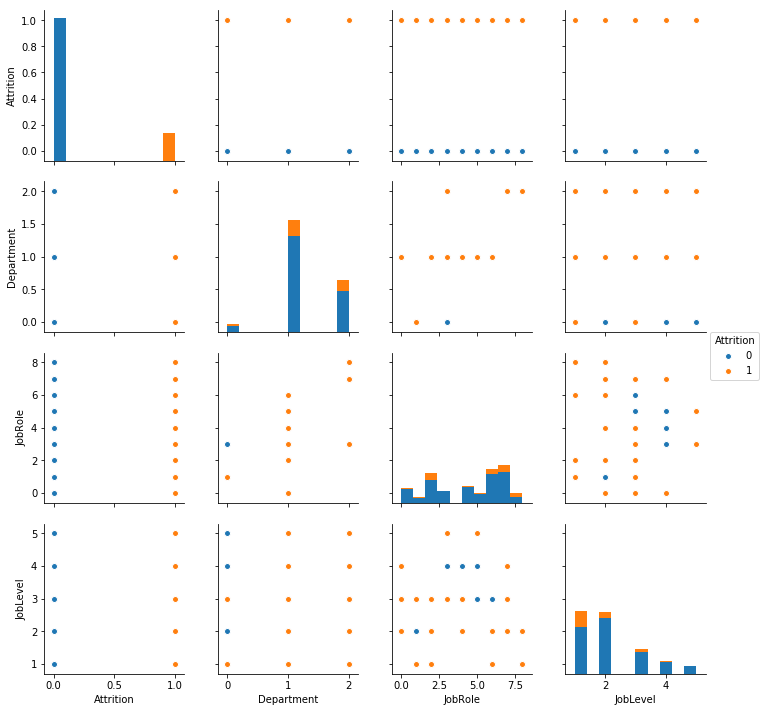

In [19]:
# 2) Emlpoyment based features: department, job role, job level
demo_data = hr_data_num[['Attrition','Department','JobRole','JobLevel']]
pair_plot = sns.pairplot(demo_data, hue = 'Attrition')

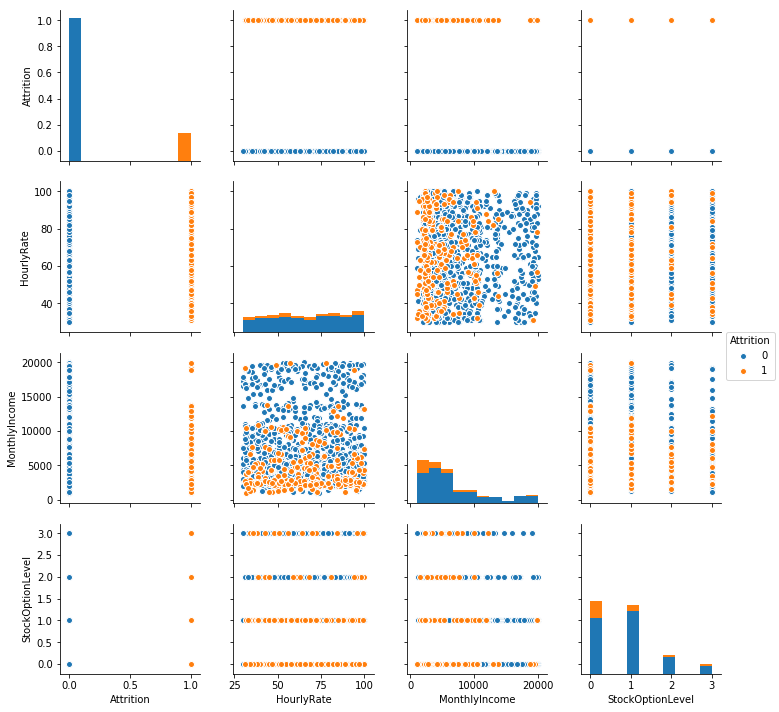

In [20]:
#3) compensation features: hourly rate, monthly income, stock option level
demo_data = hr_data_num[['Attrition','HourlyRate','MonthlyIncome','StockOptionLevel']]
pair_plot = sns.pairplot(demo_data, hue = 'Attrition')

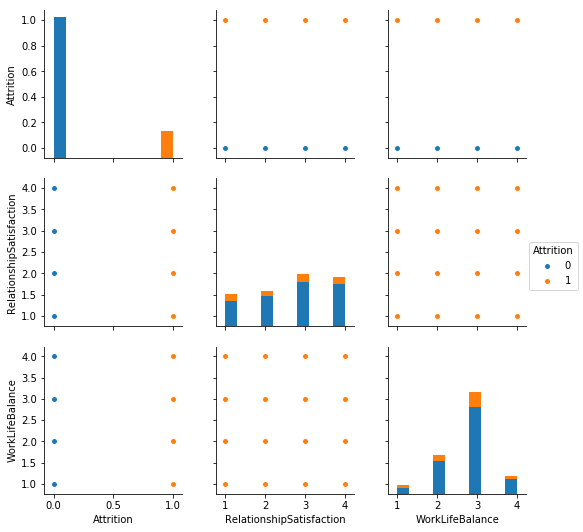

In [21]:
# 4) Survey Results: Satisfaction level, worklife balance
demo_data = hr_data_num[['Attrition','RelationshipSatisfaction','WorkLifeBalance']]
pair_plot = sns.pairplot(demo_data, hue = 'Attrition')

In [23]:
# couldn't get this to work, such a big plot!
# pair_plot = sns.pairplot(hr_data, hue = 'Attrition')

In [ ]:
# - **Age_**: seems to be normal distribution. The younger age(such as younger than 35 years old) seem to churn way more often that the older ages.
# - **Daily Rate**: seems to be have the same amount of attrition across different daily rates ranges.
# - **DistanceFromHome**: different from my original assumption. People seem to be more likely to churn when its less than 10 miles or more than 20 miles. Left skewed.
# - **Education**: It seems that employees who have less than a master's degree are more likely to churn. A bit right skewed.
# - **EmployeeSastifaction**: It seems that employees with low sastifaction rates are most likely to leave. Kind of uniform distribution
# - **HourlyRate**: can't tell any  trends. might need a log transformation
# - **Job involvement**: the lower the job involvement, the more likely they will leave. Normal distribution.
# - **Job Level**: the lower the job level, the more likely they will leave.
# - **Job Satistifaction**: the lower the job satisfaction, the more likely they are the leave.
# - **Monthlyincome**: the lower the monthly income, the more likely they are to churn.
# - **MonthlyRate**: monthly rate around 10,000 seem to be more likely to churn.
# - **NumCompaniesWorked**: when the number of companies worked is around 2, the employee is more likely to churn.
# - **PerformanceRating**: More people are rated on 3 versus 4. 
# - **StandardHours**: this metric seem a bit strange. it seems that all are working 80 hours.
# - **StockOptionLevel**: lower stock option level seem to have more churn. left skewed.
# - **TotalWorkingYears**: less total working years seem to have more churn. left skewed data. 
# - **TrainingTimesLastYear**: too little or the medium amount of training are more likely to churn.
# - **WorkLifeBalance**:  
# - **YearsAtCompany**: it seems that there are less years a tthe company, more likely to churn.
# - **YearsInCurrentRole**: less years in current role more likely to churn.
# - **YearsSinceLastPromotion**: less years since last promotion more likely to churn
# - **YearsWithCurrManager**: less than 5 years are more liely to churn.
# 
# covert the following variables to factors:'Department','Education','EducationField','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'PerformanceRating','StockOptionLevel','WorkLifeBalance'
# 
# 
# also consider the correlation among hourly rate, monthly income, monthly rate and consider leaving only one variable
# the following variables and the relationship with churn is not very easy to view "NumCompaniesWorked","HourlyRate",'PerformanceRating', "'RelationshipSatisfaction', "WorkLifeBalance'
# *another obervation* : HR data tend to left skewed in terms of compensation etc related. In the pyramid shape,, there are usually more employees at the bottom wit less years of experiences, less pay, less stock options etc.
# 


In [ ]:
# In[ ]:


pair_plot.savefig("pair_plot.png")


# In[ ]:


# calculate correlations among  hourly rate, monthly income, monthly rate 
correlations_hr_data_rate = hr_data[['DailyRate','HourlyRate', 'MonthlyIncome','MonthlyRate']].corr(method = 'pearson')
print(correlations_hr_data_rate)
# very low amount of correlations among the income related variables


In [ ]:
# In[ ]:


# the following variables are using categorical variables and we will convert them to numerical ones:Attrition, 
# BusinessTravel, Department, EducationField

#labels,unique = pd.factorize(hr_data.Attrition)
#hr_data.Attrition = labels
#hr_data.Attrition.head()


In [ ]:
# In[ ]:


cat_hr_data = hr_data.select_dtypes(include = ['object'].copy())
cat_hr_data.head()


In [ ]:
# In[ ]:


BusinessTravel_count = cat_hr_data['BusinessTravel'].value_counts()
sns.barplot(BusinessTravel_count.index, BusinessTravel_count.values,alpha = 0.9)
plt.title('Frequency Distribution of Business Travel')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Business Travel Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


BusinessTravel_count = cat_hr_data['Attrition'].value_counts()
sns.barplot(BusinessTravel_count.index, BusinessTravel_count.values,alpha = 0.9)
plt.title('Frequency Distribution of Attrition')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Attrition Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


Department_count = cat_hr_data['Department'].value_counts()
sns.barplot(Department_count.index, Department_count.values,alpha = 0.9)
plt.title('Frequency Distribution of Department')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Department Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


EducationField_count = cat_hr_data['EducationField'].value_counts()
sns.barplot(EducationField_count.index, EducationField_count.values,alpha = 0.9)
plt.title('Frequency Distribution of EducationField')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('EducationFieldl Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


Gender_count = cat_hr_data['Gender'].value_counts()
sns.barplot(Gender_count.index, Gender_count.values,alpha = 0.9)
plt.title('Frequency Distribution of Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


JobRole_count = cat_hr_data['JobRole'].value_counts()
fig, ax = plt.subplots(figsize=(18,4))
grid = sns.barplot(JobRole_count.index, JobRole_count.values,alpha = 0.9)
plt.title('Frequency Distribution of JobRole')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('JobRole Type', fontsize = 12)

plt.show()

In [ ]:
# In[ ]:


MaritalStatus_count = cat_hr_data['MaritalStatus'].value_counts()
sns.barplot(MaritalStatus_count.index, MaritalStatus_count.values,alpha = 0.9)
plt.title('Frequency Distribution of MaritalStatus')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('MaritalStatus Type', fontsize = 12)
plt.show()

In [ ]:
# In[ ]:


Over18_count = cat_hr_data['Over18'].value_counts()
sns.barplot(Over18_count.index, Over18_count.values,alpha = 0.9)
plt.title('Frequency Distribution of Over18')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Over18 Type', fontsize = 12)
plt.show()

In [ ]:
# there is almost no variance in this variable. this variabel could be removed.


In [ ]:
# In[ ]:


OverTime_count = cat_hr_data['OverTime'].value_counts()
sns.barplot(OverTime_count.index, OverTime_count.values,alpha = 0.9)
plt.title('Frequency Distribution of OverTime')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('OverTime Type', fontsize = 12)
plt.show()


# In[ ]:


# understand feature importance
